Just making sure here that the DMDc algorithm works here before I venture out and try from scratch

# Wish me luck


In [1]:
import numpy as np
from pydmd import DMD
from pydmd import DMDc
import scipy as sci
import matplotlib.pyplot as plt
figsize = (12, 5)
dpi = 600

In [2]:
#Ok lets get started
m=5
A = np.array([[1.5, 0.0],
              [0.0, 0.1]])
B = np.array([[1.],[0.0]])

#X = np.array([[4., 2., 1., .5, .25],
#              [7., .7, .07, .007, .0007]])
X0 = np.array([[4],[7]])

X = np.zeros((2,m))
u = np.zeros((1,m-1))
X[:,0] = X0[:,0]
Xnul = np.zeros((2,m))
Xnul[:,0] = X0[:,0]
for i in range(0,m-1):
    useme = np.array([[X[0,i]],[X[1,i]]])
    useme2 = np.array([[Xnul[0,i]],[Xnul[1,i]]])
    checkme = np.matmul(A,useme) -B*useme
    checkme2 = np.matmul(A,useme2)
    X[0,i+1]= checkme[0,0]
    X[1,i+1]= checkme[1,0]
    Xnul[0,i+1]= checkme2[0,0]
    Xnul[1,i+1]= checkme2[1,0]
    u[0,i] = -useme[0,0]
#lets make this a computation
u = np.array([[-4., -2., -1., -.5]])
u2 = np.array([[0., 0., 0., 0.]])
dmdc = DMDc(svd_rank=-1)
dmdc.fit(X,u,B)
print(dmdc.atilde)

[[0.49752013 0.63127326]
 [0.63127326 1.10247987]]


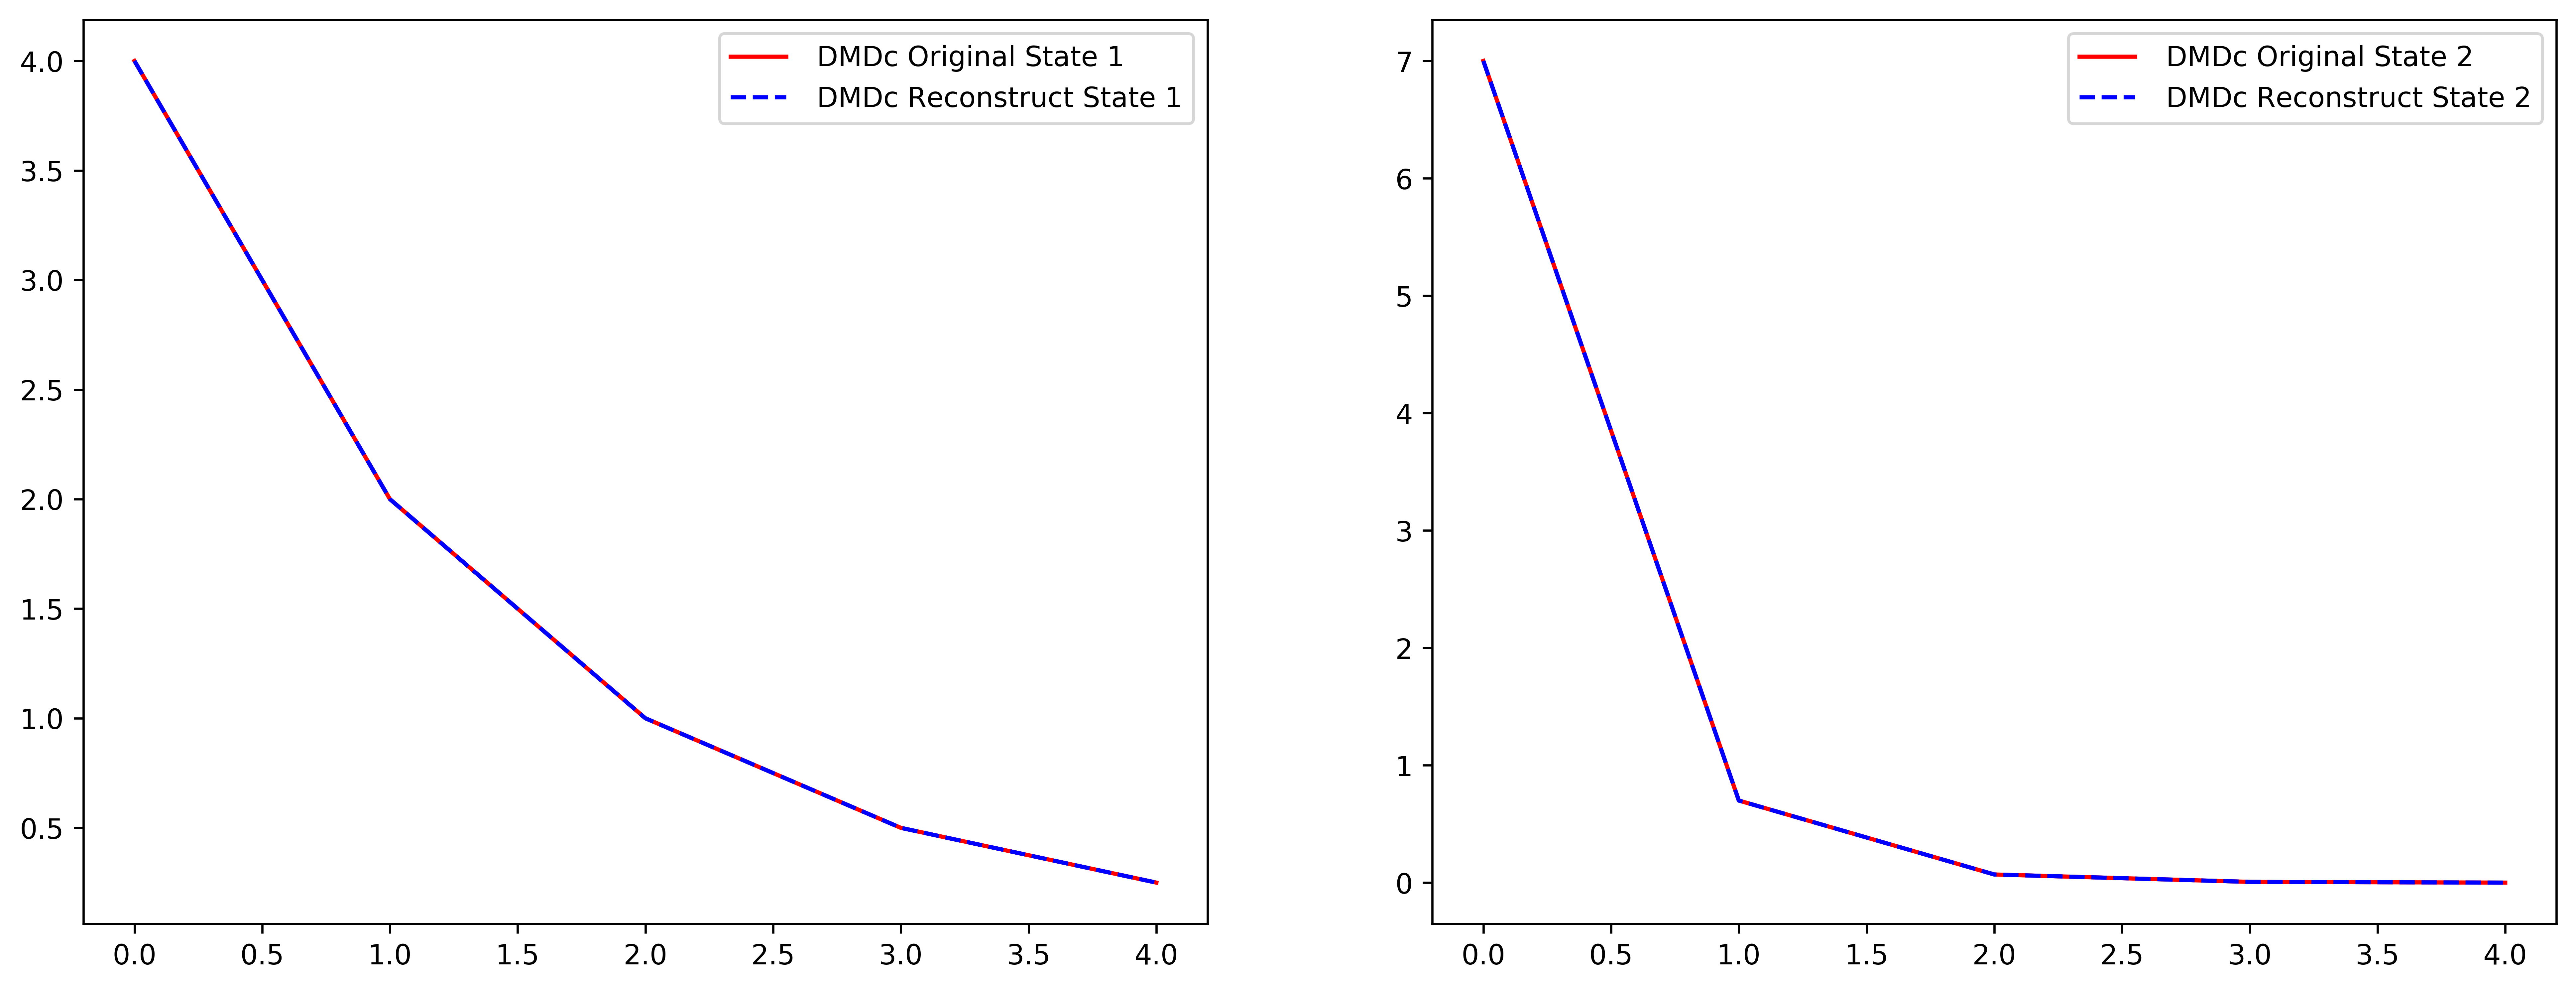

In [3]:
tspan = np.array([[1,2,3,4,5]])
s1, s2 = dmdc.reconstructed_data().real
plt.figure(figsize=(16,6), dpi=dpi)
plt.title("Reconstructed Angular position and rate")
plt.subplot(121)
plt.plot(X[0,:],'r-',label = r' DMDc Original State 1')
plt.plot(s1,'b--',label = r' DMDc Reconstruct State 1')
plt.legend(loc='best')
plt.subplot(122)
plt.plot(X[1,:],'r-',label = r' DMDc Original State 2')
plt.plot(s2,'b--',label = r' DMDc Reconstruct State 2')
plt.legend(loc='best')
plt.show()

[[1.50000000e+00 1.49424981e-16]
 [4.87636403e-17 1.00000000e-01]]


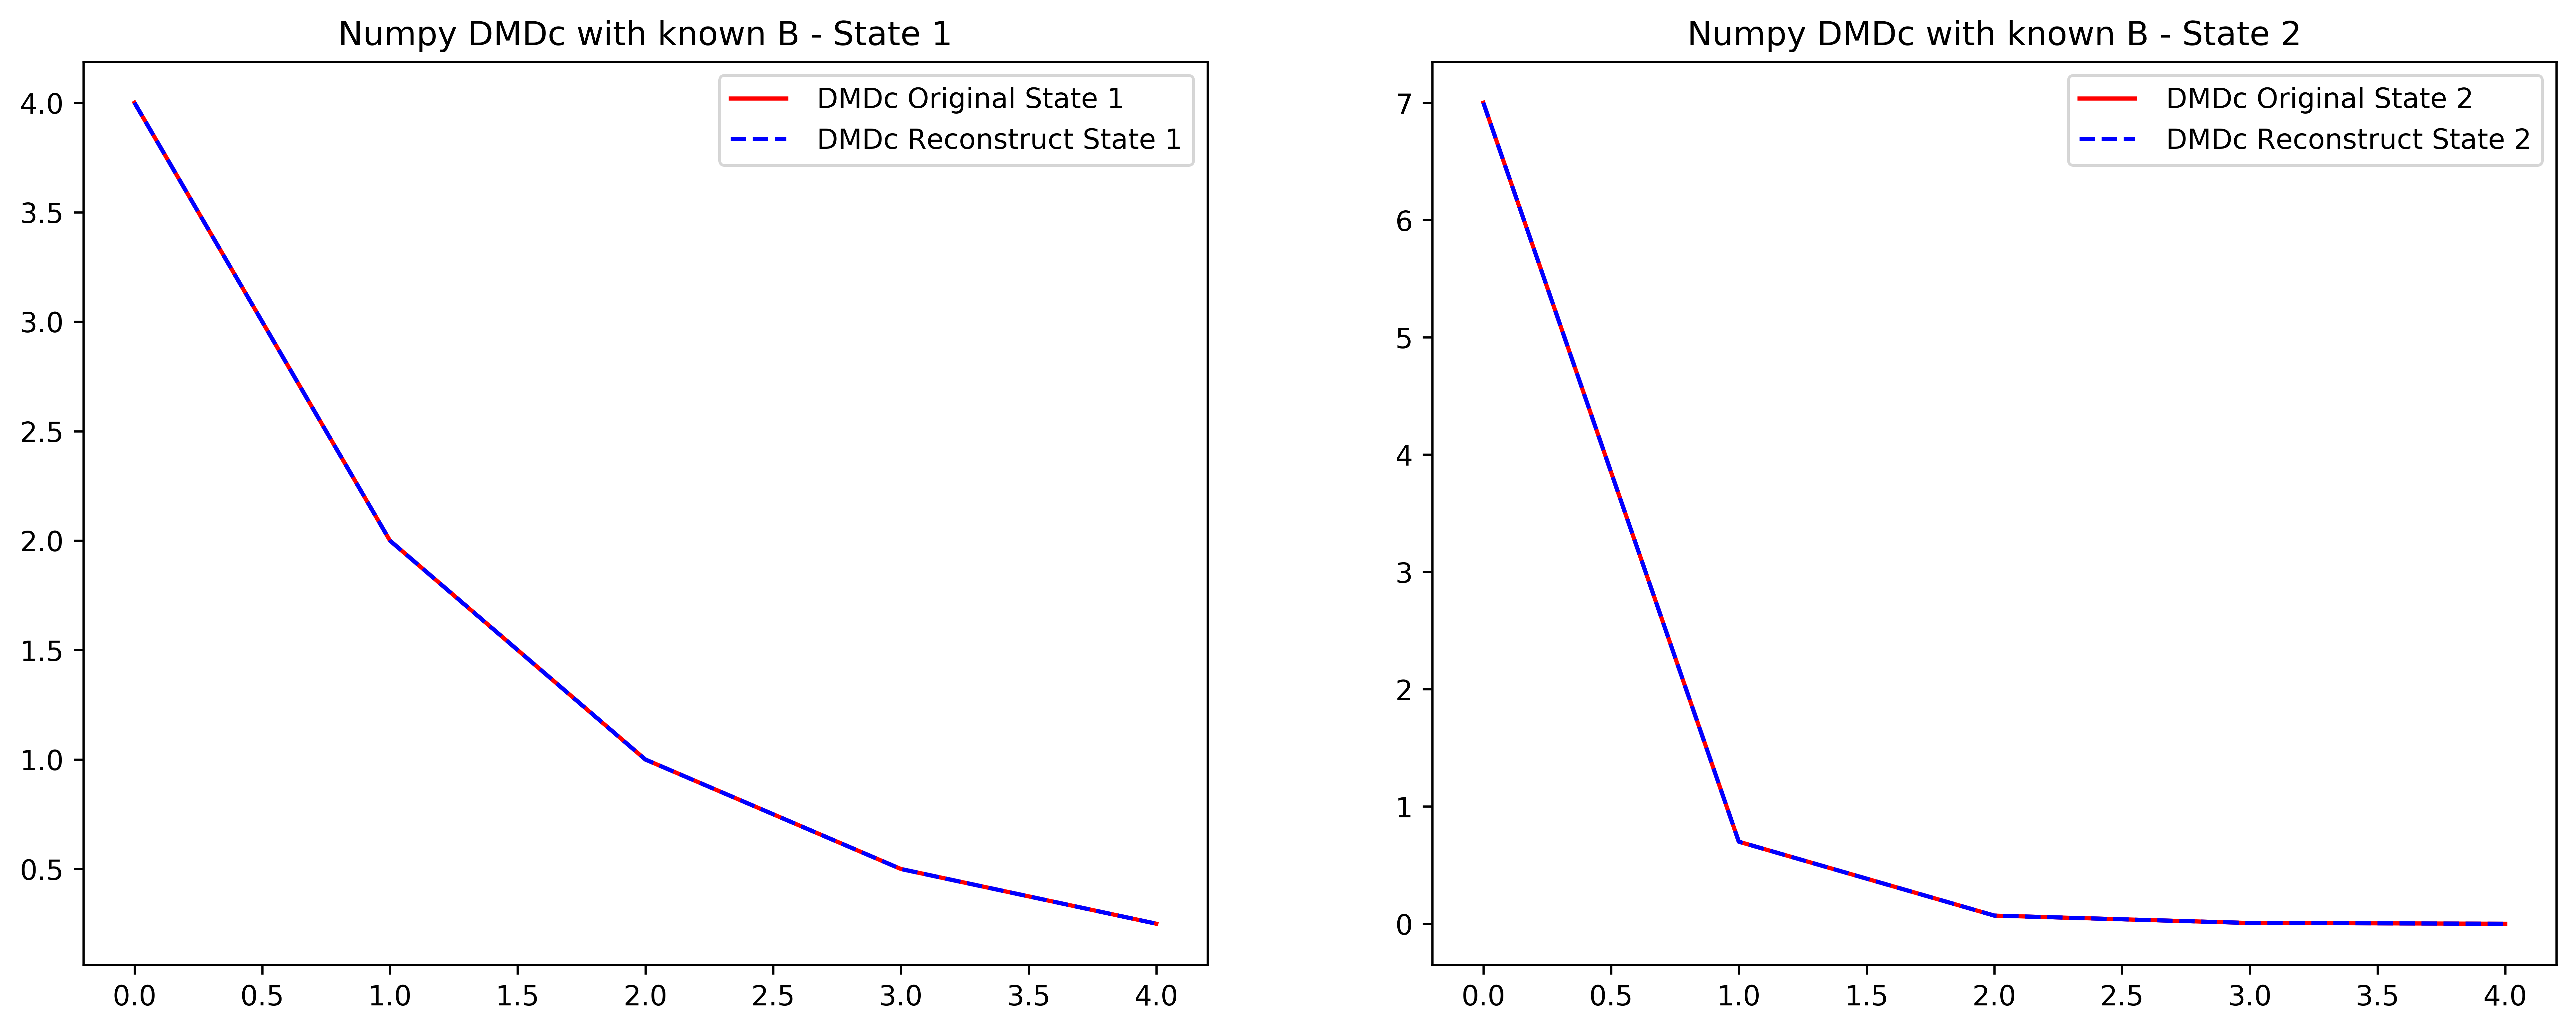

In [4]:
X1 = X[:,0:4]
X2 = X[:,1:5]
Omega = np.array([[4., 2., 1., .5],
                [7., .7, .07, .007],
                [-4., -2., -1., -.5]])
U,Sig,V = np.linalg.svd(X1,full_matrices=True)

r=2

U = U[0:r,:].T
sig = np.diag(np.reciprocal(Sig)) #Figure out later why python stupid
V = V[0:r,:].T
holder = X2 - B*u
A_DMDc = np.linalg.multi_dot([holder,V,sig,U.T.conj()])
print(A_DMDc)
Xplot1 = np.zeros((2,5))
Xplot1[:,0] = X[:,0]
for i in range(0,4):
    useme = np.array([[Xplot1[0,i]],[Xplot1[1,i]]])
    checkme = np.matmul(A_DMDc,useme) -B*useme
    Xplot1[0,i+1]= checkme[0,0]
    Xplot1[1,i+1]= checkme[1,0]

plt.figure(figsize=(16,6), dpi=dpi)
plt.subplot(121)
plt.title("Numpy DMDc with known B - State 1")
plt.plot(X[0,:],'r-',label = r' DMDc Original State 1')
plt.plot(Xplot1[0,:],'b--',label = r' DMDc Reconstruct State 1')
plt.legend(loc='best')
plt.subplot(122)
plt.title("Numpy DMDc with known B - State 2")
plt.plot(X[1,:],'r-',label = r' DMDc Original State 2')
plt.plot(Xplot1[1,:],'b--',label = r' DMDc Reconstruct State 2')
plt.legend(loc='best')
plt.show()

[[1.50000000e+00 1.49424981e-16]
 [4.87636403e-17 1.00000000e-01]]


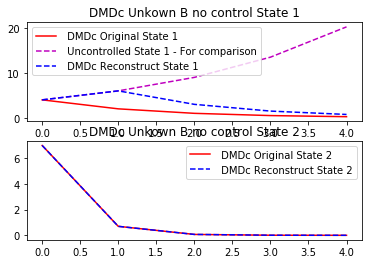

In [5]:
U,Sig,V = np.linalg.svd(X1,full_matrices=True)

r=2

U = U[0:r,:].T
sig = np.diag(np.reciprocal(Sig)) #Figure out later why python stupid
V = V[0:r,:].T
holder = X2 - B*u
A_DMDc = np.linalg.multi_dot([holder,V,sig,U.T.conj()])
print(A_DMDc)
s1 = np.zeros((1,5))
s2 = np.zeros((1,5))
s3 = np.zeros((1,5))
s1[0,0] = 4
s2[0,0] = 7
s3[0,0] = 4

for i in range(0,4):
    useme = np.array([[Xplot1[0,i]],[Xplot1[1,i]]])
    checkme = np.matmul(A_DMDc,useme) -B*u2
    s1[0,i+1]= checkme[0,0]
    s2[0,i+1]= checkme[1,0]


plt.subplot(211)
plt.title("DMDc Unkown B no control State 1")
plt.plot(X[0,:],'r-',label = r' DMDc Original State 1')
plt.plot(Xnul[0,:],'m--',label = r' Uncontrolled State 1 - For comparison')
plt.plot(s1.T,'b--',label = r' DMDc Reconstruct State 1')
plt.legend(loc='best')
plt.subplot(212)
plt.title("DMDc Unkown B no control State 2")
plt.plot(X[1,:],'r-',label = r' DMDc Original State 2')
plt.plot(s2.T,'b--',label = r' DMDc Reconstruct State 2')
plt.legend(loc='best')
plt.show()


[[ 0.16364721  0.01792522]
 [-0.47840561 -0.03473532]]


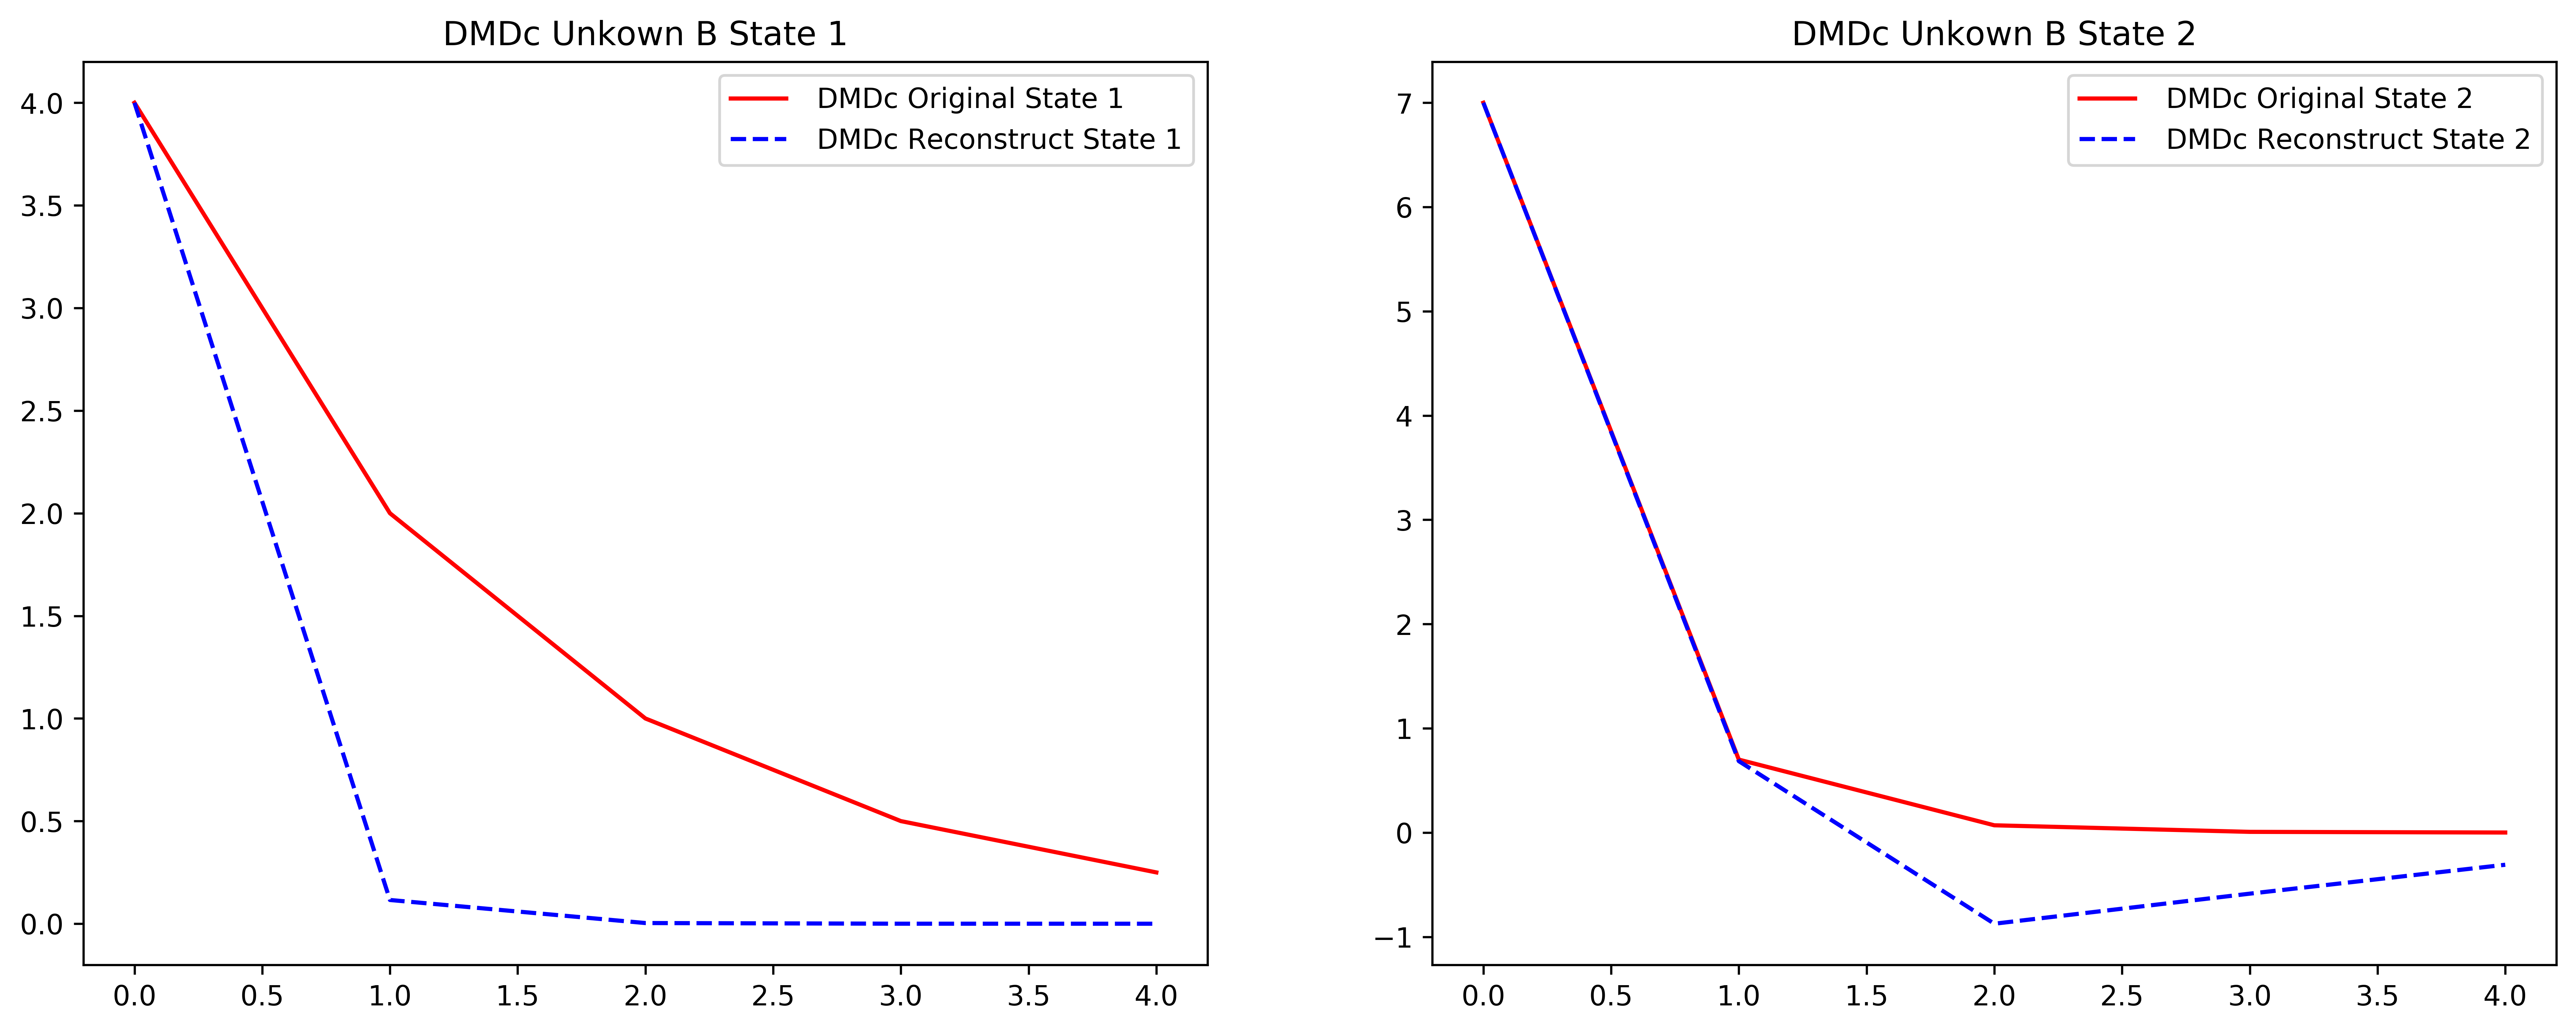

In [6]:
dmdc1 = DMDc(svd_rank=-1)
dmdc1.fit(X,u)
print(dmdc1.atilde)
tspan = np.linspace(0.0, m, 1)
s1, s2 = dmdc1.reconstructed_data().real
plt.figure(figsize=(16,6), dpi=dpi)

plt.subplot(121)
plt.title("DMDc Unkown B State 1")
plt.plot(X[0,:],'r-',label = r' DMDc Original State 1')
plt.plot(s1,'b--',label = r' DMDc Reconstruct State 1')
plt.legend(loc='best')
plt.subplot(122)
plt.title("DMDc Unkown B State 2")
plt.plot(X[1,:],'r-',label = r' DMDc Original State 2')
plt.plot(s2,'b--',label = r' DMDc Reconstruct State 2')
plt.legend(loc='best')
plt.show()

In [7]:
print(dmdc1.B)
Xplot2 = np.zeros((2,m))
Xplot2[:,0] = X[:,0]
for i in range(0,m-1):
    useme = np.array([[Xplot1[0,i]],[Xplot1[1,i]]])
    checkme = np.matmul(dmdc1.atilde,useme) -dmdc1.B*useme
    Xplot2[0,i+1]= checkme[0,0]
    Xplot2[1,i+1]= checkme[1,0]

plt.figure(figsize=(22,10), dpi=dpi)
plt.subplot(121)
plt.title("DMDc Unkown B State 1 - Module Reconstruction")
plt.plot(X[0,:],'r-',label = r' DMDc Original State 1')
plt.plot(Xplot2[0,:],'b--',label = r' DMDc Reconstruct State 1')
plt.legend(loc='best')
plt.subplot(122)
plt.title("DMDc Unkown B State 2 - Module Reconstruction")
plt.plot(X[1,:],'r-',label = r' DMDc Original State 2')
plt.plot(Xplot2[1,:],'b--',label = r' DMDc Reconstruct State 2')
plt.legend(loc='best')
plt.show()

[[-3.21914725e-18]
 [ 5.00000000e-01]]


In [8]:
Omega = np.zeros((3,m-1))
for i in range(0,m-1):
    #print(i)
    Omega[0,i] = X[0,i]
    Omega[1,i] = X[1,i]
    Omega[2,i] = u[0,i]

Omega2 = np.vstack([X[:,:m-1],u])
Up, sp, Vp = sci.linalg.svd(Omega, lapack_driver='gesvd')
Vp = Vp.T
Vp = Vp[:,:r]
Sp= np.diag(np.reciprocal(sp[:r]))
Up1 = Up[:r, :r]
Up2 = Up[r:, :r]
Ur, sr, Vr = sci.linalg.svd(X2, lapack_driver='gesvd')


Atilde = np.linalg.multi_dot([Ur.T.conj(), X2, Vp,
            Sp, Up1.T.conj(), Ur])
Btilde = np.linalg.multi_dot([Ur.T.conj(), X2, Vp,
            Sp, Up2.T.conj()])

s1 = np.zeros((1,m))
s2 = np.zeros((1,m))
s1[0,0] = 4
s2[0,0] = 7
print('This is Atilde',Atilde)
print('this is Btilde:',Btilde)

for i in range(0,4):
    useme = np.array([[Xplot1[0,i]],[Xplot1[1,i]]])
    checkme = np.matmul(Atilde,useme) -Btilde*u
    s1[0,i+1]= checkme[0,0]
    s2[0,i+1]= checkme[1,0]

plt.figure(figsize=(22,10), dpi=dpi)
plt.subplot(121)
plt.title("DMDc Unkown B State 1 - Module Reconstruction Homebrew")
plt.plot(X[0,:],'r-',label = r' DMDc Original State 1')
plt.plot(s1.T,'b--',label = r' DMDc Reconstruct State 1')
plt.legend(loc='best')
plt.subplot(122)
plt.title("DMDc Unkown B State 2 - Module Reconstruction")
plt.plot(X[1,:],'r-',label = r' DMDc Original State 2')
plt.plot(s2.T,'b--',label = r' DMDc Reconstruct State 2')
plt.legend(loc='best')
plt.show()

This is Atilde [[0.23897668 0.03914057]
 [0.03914057 0.11102332]]
this is Btilde: [[0.24063863]
 [0.06777204]]


In [9]:
U, Sig, V = sci.linalg.svd(X, lapack_driver = 'gesvd')
print(U)
print(Sig)
print(V)
print(X)

[[-0.53322889 -0.84597101]
 [-0.84597101  0.53322889]]
[8.25061648 1.65371618]
[[-0.97625585 -0.20103195 -0.07180637 -0.03303223 -0.01622902]
 [ 0.21086942 -0.79740515 -0.48898656 -0.25352168 -0.12766368]
 [ 0.04065958 -0.49245199  0.86588126 -0.06968012 -0.03510214]
 [ 0.02518616 -0.25457265 -0.06911651  0.96408189 -0.01809504]
 [ 0.01307872 -0.12812099 -0.03476397 -0.01806686  0.99089808]]
[[4.0e+00 2.0e+00 1.0e+00 5.0e-01 2.5e-01]
 [7.0e+00 7.0e-01 7.0e-02 7.0e-03 7.0e-04]]


In [10]:
A = np.array([[1, 2],[3,4]])
U, Sig, V = sci.linalg.svd(A, lapack_driver = 'gesvd')